In [6]:

import pandas as pd
data = pd.read_excel('final_rinab+dai2.xlsx')

In [5]:
cd /Users/Andrei/Documents/Data

/Users/Andrei/Documents/Data


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# code from https://github.com/AnalyticsInsightsNinja/PythonVisualAnalytics/blob/master/01_AV_Adavced_Histogram.ipynb
# Plot the Histogram from the random data

def histogram_plot(column, title='Rinab', ylabel='frequency', xlabel='rinab', bin_no=7, legend_title='N=61'):
    fig, ax = plt.subplots(figsize=(8,8))
    counts, bins, patches = ax.hist(column, bins=bin_no, facecolor='mediumaquamarine', edgecolor='gray')

    ax.set_xticks(bins.round(2))
    plt.xticks(rotation=0)

    # Set the graph title and axes titles
    plt.title(title, fontsize=20)
    plt.ylabel(ylabel, fontsize=15)
    plt.xlabel(xlabel, fontsize=15)

    # Calculate bar centre to display the count of data points and %
    bin_x_centers = 0.5 * np.diff(bins) + bins[:-1]
    bin_y_centers = ax.get_yticks()[1] * 0.25

    #Display the the count of data points and % for each bar in histogram
    for i in range(len(bins)-1):
        bin_label = "{0:,}".format(counts[i]) + "  ({0:,.2f}%)".format((counts[i]/counts.sum())*100)
        plt.text(bin_x_centers[i], bin_y_centers, bin_label, rotation=90, rotation_mode='anchor')

    plt.legend(fontsize=10, title=legend_title)

No handles with labels found to put in legend.


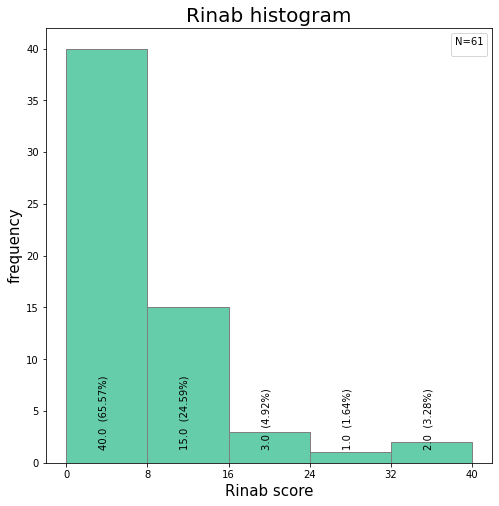

In [16]:
histogram_plot(data.Rinab_total, title='Rinab histogram',bin_no=[0,8,16,24,32,40], legend_title='N=61', xlabel='Rinab score')


In [15]:
np.sqrt(61)

7.810249675906654

No handles with labels found to put in legend.


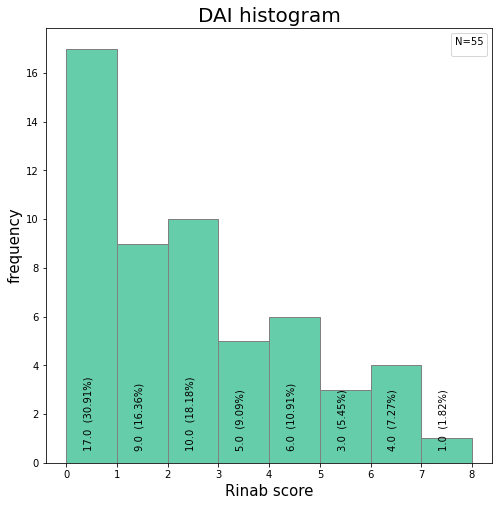

In [19]:
histogram_plot(data.DAI, title='DAI histogram',bin_no=[0,1,2,3,4,5,6,7,8], legend_title='N=55', xlabel='Rinab score')
